In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Admission_Prediction.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

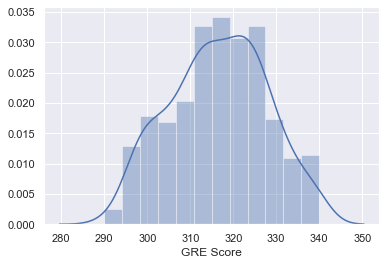

In [7]:
sns.distplot(df['GRE Score'])

In [8]:
df['GRE Score'].mean()

316.55876288659795

In [9]:
df['GRE Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

In [10]:
df['TOEFL Score'].fillna(df['GRE Score'].mode()[0],inplace=True)

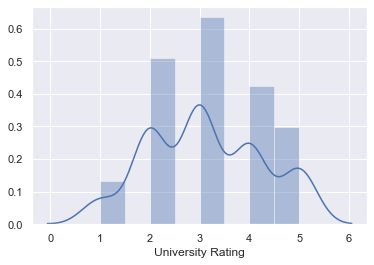

In [11]:
sns.distplot(df['University Rating'])

In [12]:
df['University Rating'].fillna(df['University Rating'].median(),inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [14]:
x = df.drop(['Chance of Admit','Serial No.'],axis=1)

In [15]:
y=df['Chance of Admit']

In [16]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


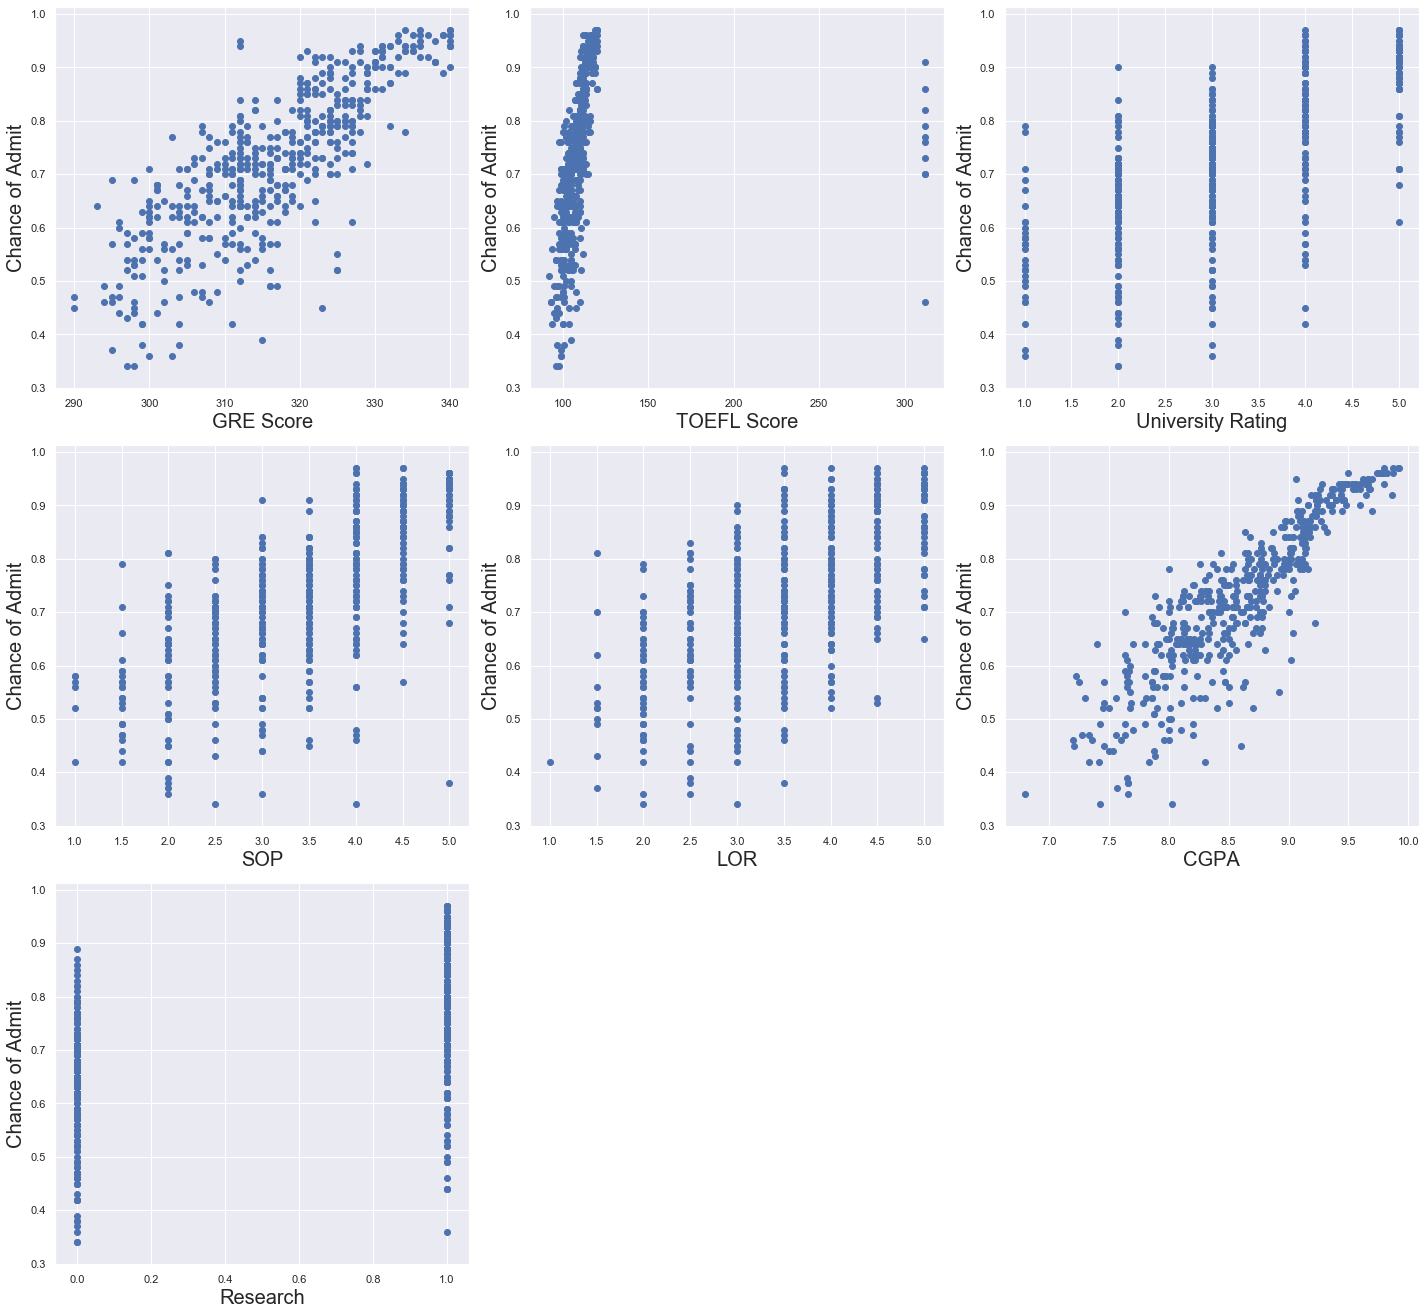

In [17]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

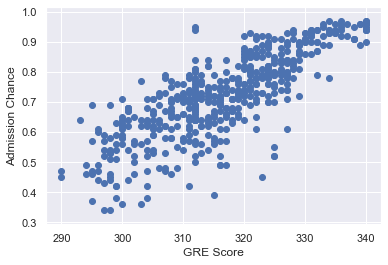

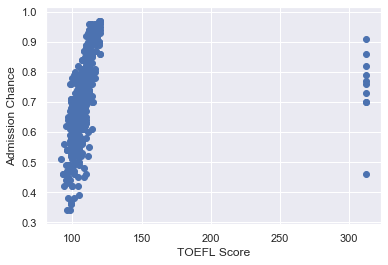

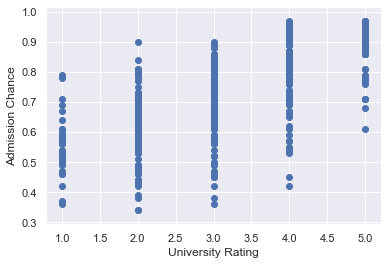

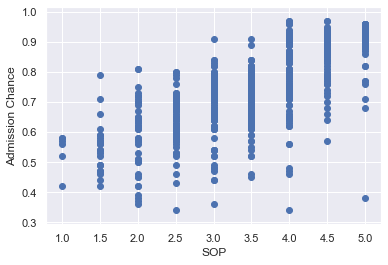

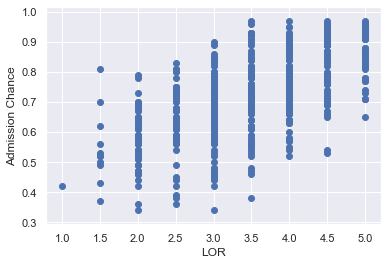

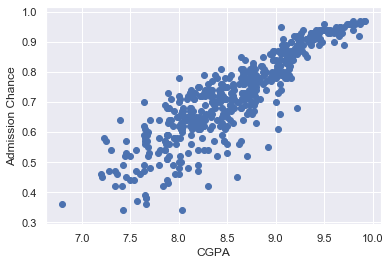

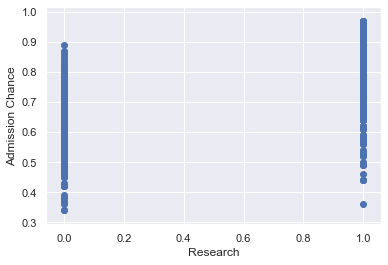

In [18]:
for i in x:
    plt.scatter(x[i],y)
    plt.xlabel(i)
    plt.ylabel('Admission Chance')
    plt.show()

In [19]:
x.head() #HIGH VARIATION!

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [20]:
#make data standard
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_feat = scaler.fit_transform(x)
scaled_feat

array([[ 1.85052822,  0.22918334,  0.78200955, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.68147064, -0.1461914 ,  0.78200955, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.39765943, -0.24856632, -0.10462259, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.22103568,  0.29743329,  1.66864169, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39765943, -0.2826913 ,  0.78200955, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.95125316,  0.05855846,  0.78200955, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = scaled_feat
print(variables.shape)

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# # Finally, I like to include names so it is easier to explore the result
vif["Features"] = x.columns

(500, 7)


In [22]:
vif

,VIF,Features
0,3.278016,GRE Score
1,1.039717,TOEFL Score
2,2.491007,University Rating
3,2.749478,SOP
4,2.045909,LOR
5,4.258710,CGPA
6,1.461466,Research


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_feat,y,test_size=0.33,random_state=100)

In [24]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.score(x_train,y_train) #accuracy in training

0.809382903198379

In [26]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0


In [27]:
az= pd.dataframe()
az['Coef'] = reg.coef_
az['Index'] = []

AttributeError: module 'pandas' has no attribute 'dataframe'

In [28]:
from sklearn.metrics import auc,roc_auc_score,roc_curve,r2_score
score = r2_score(reg.predict(x_test),y_test) #sebenernya gacocok kalo multi linear, multi linear cocoknya adj_r2
score #accuracy in validation

0.8082848992607381

In [29]:
predic = reg.predict(x_test)
predic

array([0.85104569, 0.47611753, 0.63118497, 0.44817923, 0.63513268,
       0.85513252, 0.56668138, 0.66962332, 0.82207324, 0.69243313,
       0.65771258, 0.61704498, 0.89215272, 0.75325461, 0.63074022,
       0.50390248, 0.58175812, 0.74857757, 0.56002799, 0.70186168,
       0.90139534, 0.61547333, 0.82449633, 0.84067919, 0.98670414,
       0.61092816, 0.69437172, 0.93220715, 0.88192603, 0.72291206,
       0.77820383, 0.83772726, 0.76772362, 0.54594003, 0.7353378 ,
       0.78812678, 0.78935056, 0.59230223, 0.51802863, 0.69512911,
       0.94656768, 0.58664825, 0.8049844 , 0.78492182, 0.80841044,
       0.55101182, 0.58915797, 0.87879241, 0.93888305, 0.61045422,
       0.81884817, 0.72180741, 0.82109419, 0.99409504, 0.62039631,
       0.86135802, 0.61953964, 0.88100763, 0.79813477, 0.75178229,
       0.67248784, 0.61919031, 0.47141802, 0.88148275, 0.64007408,
       0.69273613, 0.69384883, 0.46602784, 0.83929024, 0.8471859 ,
       0.92261953, 0.77509786, 0.67478726, 0.82650858, 0.64501

In [30]:
asdad = pd.DataFrame({"prediction":predic,'real':y_test,"residual":predic-y_test})

In [31]:
asdad

,prediction,real,residual
69,0.851046,0.78,0.071046
29,0.476118,0.54,-0.063882
471,0.631185,0.64,-0.008815
344,0.448179,0.47,-0.021821
54,0.635133,0.70,-0.064867
...,...,...,...
5,0.867202,0.90,-0.032798
269,0.697251,0.77,-0.072749
267,0.666014,0.73,-0.063986
456,0.532792,0.51,0.022792


In [32]:
asdad['residual'].mean()

-0.012251134671667075

In [ ]:
# saving the model to the local file system
filename = 'finalized_model.pickle'
pickle.dump(reg, open(filename, 'wb'))

In [ ]:
filename1 = 'scaler_model.pickle'
pickle.dump(scaler,open(filename1,'wb'))


In [ ]:
# prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a

In [33]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [34]:
adj_r2(x_test,y_test)

0.8213410644813022

Let's see if our model overfit the data

In [36]:
from sklearn.linear_model import LassoCV,Lasso,RidgeCV,Ridge,ElasticNet,ElasticNetCV

### LassO

In [37]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [38]:
alpha = lasscv.alpha_
alpha

5.082960289417348e-05

In [39]:
lass_reg = Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=5.082960289417348e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
lass_reg.score(x_test,y_test)

0.8289667986703871

hasilnya mirip jadi kemungkinan ga overfit

## Ridge

In [41]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them
import numpy as np
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([2.75929612, 3.17016659, 1.5201205 , 1.50211558, 0.76207908,
       5.42935619, 2.96565363, 2.90648553, 0.29073647, 8.97577266,
       1.70837898, 9.18890112, 1.08457765, 9.94370691, 7.10330542,
       0.01264041, 0.01171478, 3.48811141, 2.78925104, 7.60072017,
       8.15311865, 9.72979753, 8.03770434, 8.18989056, 9.44819109,
       1.33169757, 7.44863413, 9.57475092, 0.38338474, 2.2657281 ,
       7.41106906, 0.68105592, 5.60904965, 2.64586228, 9.1983264 ,
       0.1732172 , 4.03849557, 1.97995191, 3.9779914 , 2.30030264,
       5.61950397, 3.5200934 , 6.93545675, 6.77531387, 7.38757021,
       0.25801068, 5.31684147, 4.96093435, 0.07570823, 8.27208166]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [42]:
ridgecv.alpha_

0.012640413010495122

In [43]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.012640413010495122, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=False, random_state=None, solver='auto',
      tol=0.001)

In [44]:
ridge_model.score(x_test, y_test)

0.8289720951552135

hasilnya mirip jadi kemungkinan ga overfit

# ELastic Net

In [45]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [46]:
 elasticCV.alpha_

0.0016909398103726915

In [47]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [48]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0016909398103726915, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [49]:
elasticnet_reg.score(x_test,y_test)

0.8289739753253687

Ga overfit emang

# Polynomial Regression

## When to use Polynomial Regression?
Many times we may face a requirement where we have to do a regression, but when we plot a graph between a dependent and independent variables, the graph doesn't turn out to be a linear one.
A linear graph typically looks like:
<img src="LinearGraph.png" width="300">

But what if the relationship looks like:
<img src="PolynomialGraph.png" width="300">

It means that the relationship between X and Y can't be described Linearly.
Then comes the time to use the Polynomial Regression.

We can generalize the matrix obtained above (for Linear Regression) for an equation of n coefficients(in y=mx+b, m and b are the coefficients) as follows: 
![image.png](generalEquation.png)
Where m is the _degree_(maximum power of x) of the polynomial and n is the number of observation points.
The above matrix results in the general formula for Polynomial Regression.
Earlier, we were able to visualize the calculation of minima because the graph was in three dimensions. But as there are n number of coefficients, it's not possible to create an (n+1)  dimension graph here. 

In [ ]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

In [ ]:
plt.scatter(dataset['Level'],dataset['Salary'])

In [ ]:
X=dataset.iloc[:,1:2].values #.values make x as matrix

In [ ]:
X

In [ ]:
Y=dataset.iloc[:,2].values
Y

In [ ]:
#gapake train test soalnya dikit
from sklearn.linear_model import LinearRegression
linereg = LinearRegression()
linereg.fit(X,Y)

In [ ]:
plt.scatter(X,Y,color='red')
plt.plot(x,linereg.predict(X),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

Jelek, makanya pake polinomiul

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree=5)
xpoly = polyreg.fit_transform(X)
print(xpoly)
polyreg.fit(xpoly,y)

In [ ]:
lineregpoly = LinearRegression()
lineregpoly.fit(xpoly,Y)

In [ ]:
plt.scatter(X,Y,color='red')
plt.plot(X,lineregpoly.predict(xpoly),color='blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')

## kalo degree 4/5 NGEPAS BENER fix bener OVERFIT, not good model, dont go with that!

In [ ]:
pip freeze